### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## Part 1: Load and explore data

### 1.1 Load data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load and view the CSV file(s) as reviews
reviews = pd.read_csv('turtle_reviews.csv')

reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

### 1.2 Sense check and explore data

In [3]:
# Sensecheck the data
reviews.shape

(2000, 11)

In [4]:
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [5]:
reviews.info

<bound method DataFrame.info of       gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     ed

Summary: 2000 rows of data, 11 columns, default index included, float, integer and object datatypes

### 1.3 Check for missing data

In [6]:
reviews.count()

gender                    2000
age                       2000
remuneration (k£)         2000
spending_score (1-100)    2000
loyalty_points            2000
education                 2000
language                  2000
platform                  2000
product                   2000
review                    2000
summary                   2000
dtype: int64

In [7]:
# Check for missing data
reviews_na = reviews[reviews.isna().any(axis=1)]

In [8]:
# View missing data
reviews_na

Empty DataFrame
Columns: [gender, age, remuneration (k£), spending_score (1-100), loyalty_points, education, language, platform, product, review, summary]
Index: []

Summary: There does not appear to be any missing data

### 1.4 Describe the data

In [9]:
# Descriptive statistics
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

### 1.5 Explore customer demographics

**1.5.1 Gender**

In [10]:
# Determine customer gender counts and distribution
reviews['gender'].value_counts()

Female    1120
Male       880
Name: gender, dtype: int64

<AxesSubplot:>

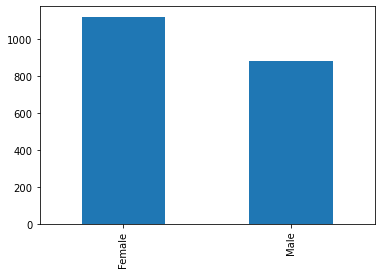

In [11]:
# Visualise gender distibution
reviews['gender'].value_counts().plot(kind='bar')

In [12]:
# Export chart as image
plt.savefig('gender.png', dpi=300)

<Figure size 432x288 with 0 Axes>

**1.5.2 Gender and Loyalty Point distribution**

<AxesSubplot:xlabel='gender', ylabel='loyalty_points'>

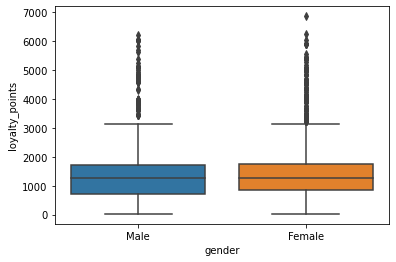

In [13]:
# Visualise gender and loyalty points relationshp with a box plot
sns.boxplot(data=reviews, x='gender', y='loyalty_points')

In [14]:
# Export chart as image
plt.savefig('GenderPoints.png', dpi=300)

<Figure size 432x288 with 0 Axes>

**1.5.3 Gender and age distribution**

<AxesSubplot:xlabel='gender', ylabel='age'>

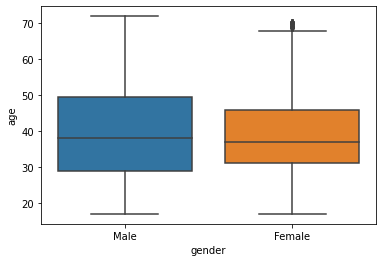

In [15]:
# Visualise gender and age relationshp with a box plot
sns.boxplot(data=reviews, x='gender', y='age')

In [16]:
# Export chart as image
plt.savefig('GenderAge.png', dpi=300)

<Figure size 432x288 with 0 Axes>

**1.5.4 Gender and salary distribution**

<AxesSubplot:xlabel='gender', ylabel='remuneration (k£)'>

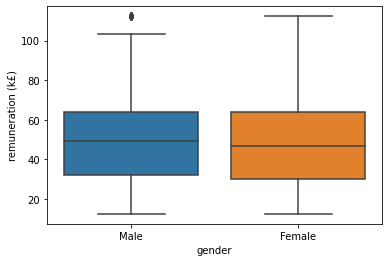

In [17]:
# Visualise gender and salary relationshp with a box plot
sns.boxplot(data=reviews, x='gender', y='remuneration (k£)')

In [18]:
# Export chart as image
plt.savefig('GenderSalary.png', dpi=300)

<Figure size 432x288 with 0 Axes>

**1.5.5 Education and loyalty points relationship**

<AxesSubplot:xlabel='education', ylabel='loyalty_points'>

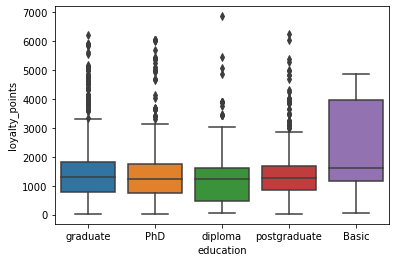

In [19]:
# Visualise education and loyalty point relationshp with a box plot
sns.boxplot(data=reviews, x='education', y='loyalty_points')

In [20]:
# Export chart as image
plt.savefig('EduPoint.png', dpi=300)

<Figure size 432x288 with 0 Axes>

**1.5.6 Spend score and loyalty points relationship**

<AxesSubplot:xlabel='spending_score (1-100)', ylabel='loyalty_points'>

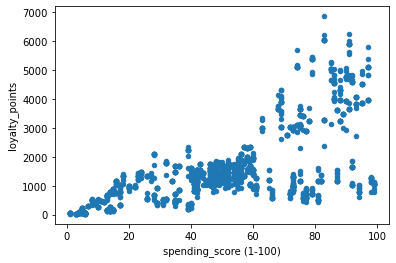

In [21]:
# Visualise spend score and loyalty point relationship with scatter plot
reviews.plot.scatter(x='spending_score (1-100)', y='loyalty_points')

In [22]:
# Export chart as image
plt.savefig('SpendScorePoint.png', dpi=300)

<Figure size 432x288 with 0 Axes>

**1.5.7 Age and loyalty points relationship**

<AxesSubplot:xlabel='age', ylabel='loyalty_points'>

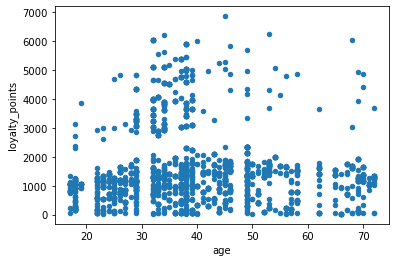

In [23]:
# Visualise age and loyalty point relationship with scatter plot
reviews.plot.scatter(x='age', y='loyalty_points')

In [24]:
# Export chart as image
plt.savefig('AgePoints.png', dpi=300)

<Figure size 432x288 with 0 Axes>

**1.5.8 Salary and loyalty point relationship**

<AxesSubplot:xlabel='remuneration (k£)', ylabel='loyalty_points'>

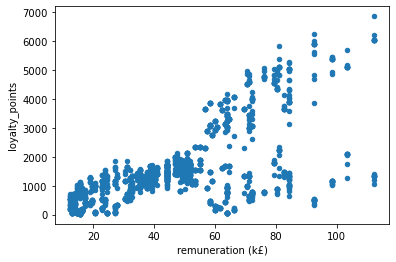

In [25]:
# Visualise salary and loyalty point relationship with scatter plot
reviews.plot.scatter(x='remuneration (k£)', y='loyalty_points')

In [26]:
# Export chart as image
plt.savefig('SalaryPoints.png', dpi=300)

<Figure size 432x288 with 0 Axes>

**1.5.9 Salary and age relationship**

<AxesSubplot:xlabel='age', ylabel='remuneration (k£)'>

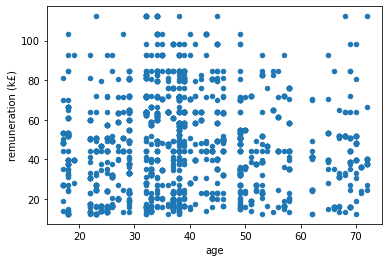

In [27]:
# Visualise salary and age relationship with scatter plot
reviews.plot.scatter(x='age', y='remuneration (k£)')

In [28]:
# Export chart as image
plt.savefig('SalaryAge.png', dpi=300)

<Figure size 432x288 with 0 Axes>

**1.5.10 Loyalty Point distribution**

In [29]:
# Create single variable to visualise by histogram
loyalty = reviews[['loyalty_points']]

<AxesSubplot:xlabel='loyalty_points', ylabel='Count'>

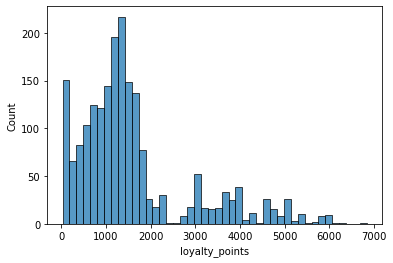

In [30]:
# Visualise loyalty point distribution with a histogram
sns.histplot(data=loyalty, x='loyalty_points')

In [31]:
# Export chart as image
plt.savefig('PointDistribution.png', dpi=300)

<Figure size 432x288 with 0 Axes>

Summary: distribution of loyalty points appears left skewed. When viewed for male and female points, significant amounts of outliers can be observed.

### 1.6 Customer demographics observations

**Customer Age**

- Mean average age is 40
- Minimum age is 17
- Maximum age is 72
- Most customers are aged between 29 and 40

**Customer Gender**

- More customers are female (56% / 1120) than male (44% / 880)
- Male and female customers have similar salary and age ranges
- Male and female customers have similar age distribution
- Loyalty point distribution is similar for male and female customers

**Customer Salary**

- Mean average salary is £48K
- Minimum salary is £12.3K
- Maximum salary is £112.3K
- Most salaries are between £30.3K and £64K

**Customer Education**

- There are 5 types of education attainment level: PhD, Postgraudate, graduate, Diploma, Basic. 
- All 4 types apart from 'basic' have similar ranges of point levels ranging from 500 to 2000
- 'Basic' differs in that it has a much broader and higher majority distribution (1500 to 4000)

**Weak / no observed variable correlations observed between:**

- salary and age
- age and loyalty point accumulation
- salary and loyalty point accumulation

## Part 2: Prepare data for linear regression

### 2.1 Drop redundant columns

In [32]:
# Drop Language and Platform columns
reviews.drop('language', inplace=True, axis=1)

In [33]:
reviews.drop('platform', inplace=True, axis=1)

In [34]:
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

### 2.2 Rename columns

In [35]:
# Rename the remuneration (k£) column header
reviews.rename(columns = {'remuneration (k£)':'salary', 'spending_score (1-100)':'spendscore'}, inplace = True)

In [36]:
reviews.columns

Index(['gender', 'age', 'salary', 'spendscore', 'loyalty_points', 'education',
       'product', 'review', 'summary'],
      dtype='object')

### 2.3 Save clean DataFrame as a CSV file

In [37]:
# Create a CSV file as output
reviews.to_csv('reviews_clean.csv', index=False)

In [38]:
# Import new CSV file with Pandas.
cust_reviews = pd.read_csv('reviews_clean.csv')

cust_reviews.head()

gender  age  salary  spendscore  loyalty_points education  product  \
0    Male   18   12.30          39             210  graduate      453   
1    Male   23   12.30          81             524  graduate      466   
2  Female   22   13.12           6              40  graduate      254   
3  Female   25   13.12          77             562  graduate      263   
4  Female   33   13.94          40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## Part 3: Linear regression

### 3.1 Spend score and loyalty points

**3.1.1 Define x and y variables**

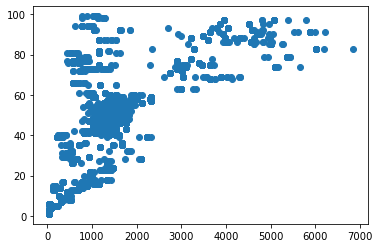

In [39]:
# Dependent variable
y = cust_reviews['spendscore'] 

# Independent variable
x = cust_reviews['loyalty_points']

# Check for linearity
plt.scatter(x,y)

In [40]:
# Export chart as image
plt.savefig('SpendPointReg.png', dpi=300)

<Figure size 432x288 with 0 Axes>

**3.1.2 Fit model and run OLS summary**

In [41]:
f = 'y ~ x'
test = ols(f, data = cust_reviews).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        12:26:26   Log-Likelihood:                -8759.4
No. Observations:                2000   AIC:                         1.752e+04
Df Residuals:                    1998   BIC:                         1.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4260      0.685     41.504      0.000      27.083      29.769
x              0.0137      0.000     40.595      0.000       0.013       0.014
==============================================================================
Omnibus:                      169.397   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.607
Skew:                           0.768   Prob(JB):                     6.81e-47
Kurtosis:                       3.441   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**3.1.3 Extract estimated parameters, standard errors and predicted values**

In [42]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    28.426033
x             0.013671
dtype: float64
Standard errors:  Intercept    0.684905
x            0.000337
dtype: float64
Predicted values:  [ 31.29703545  35.58986696  28.97289101 ... 105.17748592  42.75370042
  34.97465225]


**3.1.4 Generate regresstion table: set x coefficient and constant**

In [43]:
# x coef: 0.0137
# constant coef: 28.4260

y_pred = 0.0137 * x + 28.4260

y_pred

0        31.3030
1        35.6048
2        28.9740
3        36.1254
4        33.4402
          ...   
1995     83.6507
1996     35.8103
1997    105.3378
1998     42.7836
1999     34.9883
Name: loyalty_points, Length: 2000, dtype: float64

**3.1.5 Plot graph with regression line**

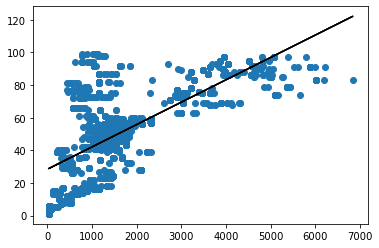

In [44]:
# Plot the data points.
plt.scatter(x,y)

# Plot the line.
plt.plot(x,y_pred, color='black')

**3.1.6 Save plot as png image file**

In [46]:
# Download and save a copy of the chart
plt.savefig('SpendLoyalty.png', dpi=300)

<Figure size 432x288 with 0 Axes>

### 3.2 Salary and loyalty points

**3.2.1 Define x and y variables**

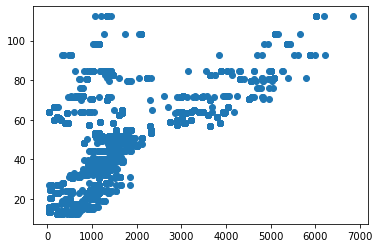

In [47]:
# Dependent variable
y = cust_reviews['salary'] 

# Independent variable
x = cust_reviews['loyalty_points']

# Check for linearity
plt.scatter(x,y)

**3.2.2 Fit model and run OLS summary**

In [48]:
f = 'y ~ x'
test = ols(f, data = cust_reviews).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        12:28:15   Log-Likelihood:                -8641.8
No. Observations:                2000   AIC:                         1.729e+04
Df Residuals:                    1998   BIC:                         1.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5606      0.646     47.321      0.000      29.294      31.827
x              0.0111      0.000     34.960      0.000       0.010       0.012
==============================================================================
Omnibus:                      382.801   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.257
Skew:                           1.230   Prob(JB):                    1.90e-143
Kurtosis:                       4.357   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**3.2.3 Extract estimated parameters, standard errors and predicted values**

In [49]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    30.560555
x             0.011101
dtype: float64
Standard errors:  Intercept    0.645817
x            0.000318
dtype: float64
Predicted values:  [32.89186761 36.3777352  31.00461446 ... 92.88431491 42.19491551
 35.87816819]


**3.2.4 Generate regresstion table: set x coefficient and constant**

In [50]:
# x coef: 0.0111
# constant coef: 30.5606

y_pred = 0.0111 * x + 30.5606

y_pred

0       32.8916
1       36.3770
2       31.0046
3       36.7988
4       34.6232
         ...   
1995    75.3047
1996    36.5435
1997    92.8760
1998    42.1934
1999    35.8775
Name: loyalty_points, Length: 2000, dtype: float64

**3.2.5 Plot graph with regression line**

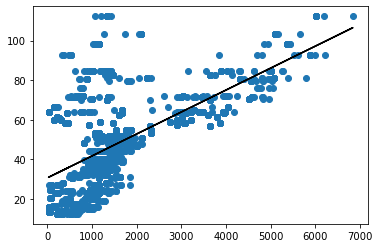

In [51]:
# Plot the data points.
plt.scatter(x,y)

# Plot the line.
plt.plot(x,y_pred, color='black')

**3.2.6 Save plot as png image file**

In [52]:
# Download and save a copy of the chart
plt.savefig('SalaryLoyalty.png', dpi=300)

<Figure size 432x288 with 0 Axes>

### 3.3 Age and loyalty points

**3.3.1 Define x and y variables**

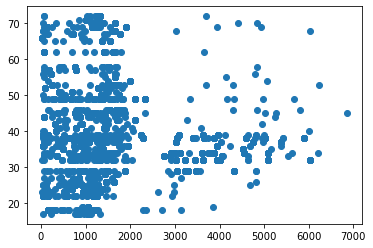

In [53]:
# Dependent variable
y = cust_reviews['age'] 

# Independent variable
x = cust_reviews['loyalty_points']

# Check for linearity
plt.scatter(x,y)

**3.3.2 Fit model and run OLS summary**

In [54]:
f = 'y ~ x'
test = ols(f, data = cust_reviews).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 10 Sep 2022   Prob (F-statistic):             0.0577
Time:                        12:29:03   Log-Likelihood:                -8051.8
No. Observations:                2000   AIC:                         1.611e+04
Df Residuals:                    1998   BIC:                         1.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.2035      0.481     83.615      0.000      39.261      41.146
x             -0.0004      0.000     -1.899      0.058      -0.001    1.47e-05
==============================================================================
Omnibus:                       99.357   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.564
Skew:                           0.574   Prob(JB):                     3.61e-25
Kurtosis:                       2.814   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**3.3.3 Extract estimated parameters, standard errors and predicted values**

In [55]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    40.203457
x            -0.000449
dtype: float64
Standard errors:  Intercept    0.480816
x            0.000236
dtype: float64
Predicted values:  [40.10917768 39.96820745 40.18549915 ... 37.683053   39.73295776
 39.98841019]


**3.3.4 Generate regresstion table: set x coefficient and constant**

In [56]:
# x coef: -0.0004
# constant coef: 40.2035

y_pred = -0.0004 * x + 40.2035

y_pred

0       40.1195
1       39.9939
2       40.1875
3       39.9787
4       40.0571
         ...   
1995    38.5911
1996    39.9879
1997    37.9579
1998    39.7843
1999    40.0119
Name: loyalty_points, Length: 2000, dtype: float64

**3.3.5 Plot graph with regression line**

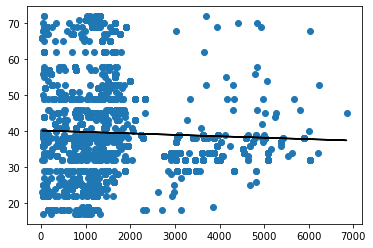

In [57]:
# Plot the data points.
plt.scatter(x,y)

# Plot the line.
plt.plot(x,y_pred, color='black')

In [58]:
# Download and save a copy of the chart
plt.savefig('AgeLoyalty.png', dpi=300)

<Figure size 432x288 with 0 Axes>

## Part 4: Observations and insights

Differing correlations with the loyalty points can be observed across the 3 variables of age, salary and spend score.

6.1 Age
Age does not appear to influence loyalty point accumulation 
- R Squared is 0.002 which suggests Age explains only 0.2% of loyalty points.
- In addition the negative x coeffient of -0.004 shows no / negative changes in age for each loyalty point unit change.
- The P-value of 0.577 is greater that the 0.05 significance threshold / level. Therefore it is not possible to reject the null hypthesis that any correlation occured by chance.
- The Durbin-Watson test produces a value of 2.129 suggesting no autocorrelation between residuals
- Skew is 0.574 indicating moderate positive / right skewness
- Kurtosis is 2.184 indicating light tailed, playtykurtic distribution. However as kurtosis is close the perfect (value of 3), it can be inferred that near normal distribution is present.
- The standard error is very low producing a value of 0.000236 indicating low dispersal from line of best fit. Therefore model is a good fit.
- The t probability value is 0.577. This value is greater than the 0.05 threshold level suggesting that the age variable does not have a significant impact of loyalty point levels.

6.2 Salary
Salary show greater correlation with loyalty points
- R Squared is 0.380 which means 38% of Salary variable can explain loyalty point levels.
- In addition the x coeffient of 0.111 indicates salary increases by £11.10 for each unit loyalty point unit change.
- The P-value is extremely low at 2.43e-209, much lower that the 0.05 confidence level - indicating a strong correlation between salary score and loyalty points
- Interestingly, the Durbin-Watson value of 1.461 indicates possible autocorrelation between residuals is present.
- Skew is 1.230 which indicates a higher positive right skew.
- Kurtosis is 4.357 which indicates a heavy tailed leptokurtic distribution
- The standard error is very low at 0.000318 which indicates that model regression line is a good fit.
- The t probability value is zero indicating a very strong correlation between salary and the accumulation of loyalty points.

6.3 Spending Score
Spending score shows the greatest correlation with loyalty points
- R Squared is 0.452 which suggest customer spend 45.2% explains levels of loyalty points.
- The x coefficient is 0.0137 indicating that spend score increases with levels of loyalty points
- The P-value is extremely low at 2.92e-263 - much lower that the 0.05 confidence level - indicating a very strong correlation between spending score and loyalty points.
- The Durbin-Watson test produces a value of 2.599 suggesting no autocorrelation between residuals.
- Skew is 0.768 indicating a moderate positive / right skew.
- Kurtosis is 3.441. This indicates a fairly normal distribution which is slightly heavytailed.
- The standard error is 0.000337. This very low value indicates that regression line is a good fit.
- The probability t value is 0.0137 indicating a strong correlation between salary and the accumulation of loyalty points.

------------------------------------------------------------------------------

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## Part 1: Load and explore the data

### 1.1 Load data

In [45]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [46]:
# Import new CSV file with Pandas.
df2 = pd.read_csv('reviews_clean.csv')

df2.head()

gender  age  salary  spendscore  loyalty_points education  product  \
0    Male   18   12.30          39             210  graduate      453   
1    Male   23   12.30          81             524  graduate      466   
2  Female   22   13.12           6              40  graduate      254   
3  Female   25   13.12          77             562  graduate      263   
4  Female   33   13.94          40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

### 1.2 Explore data

In [47]:
# View the DataFrame.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   salary          2000 non-null   float64
 3   spendscore      2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


### 1.3 Create a second data frame to explore gender: df_gender

In [48]:
# Import new CSV file with Pandas.
df_gender = pd.read_csv('reviews_clean.csv')

df_gender.head()

gender  age  salary  spendscore  loyalty_points education  product  \
0    Male   18   12.30          39             210  graduate      453   
1    Male   23   12.30          81             524  graduate      466   
2  Female   22   13.12           6              40  graduate      254   
3  Female   25   13.12          77             562  graduate      263   
4  Female   33   13.94          40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

### 1.4 Drop unnecessary columns from df2 (keep edu and gender)

In [49]:
# Drop unnecessary columns to only retain gender, salary, spendscore and education
df2 = df2.drop(columns=['age', 'loyalty_points', 'product', 'review', 'summary'])

# Display a summary of the numeric variables.
df2.describe()

salary   spendscore
count  2000.000000  2000.000000
mean     48.079060    50.000000
std      23.123984    26.094702
min      12.300000     1.000000
25%      30.340000    32.000000
50%      47.150000    50.000000
75%      63.960000    73.000000
max     112.340000    99.000000

In [50]:
# View overview information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      2000 non-null   object 
 1   salary      2000 non-null   float64
 2   spendscore  2000 non-null   int64  
 3   education   2000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 62.6+ KB


In [51]:
# View first 5 rows of data frame
df2.head()

gender  salary  spendscore education
0    Male   12.30          39  graduate
1    Male   12.30          81  graduate
2  Female   13.12           6  graduate
3  Female   13.12          77  graduate
4  Female   13.94          40  graduate

## Part 2: Exploratory visualisations

### 2.1 Visualise effects of education and gender as 'hue'

**2.1.2 Create scatter and pair plots to visualise possible effects of education on spend score and salary**

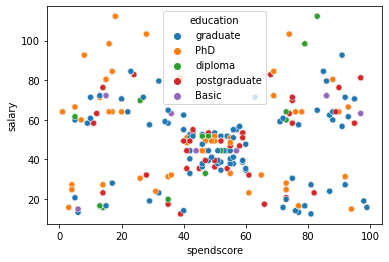

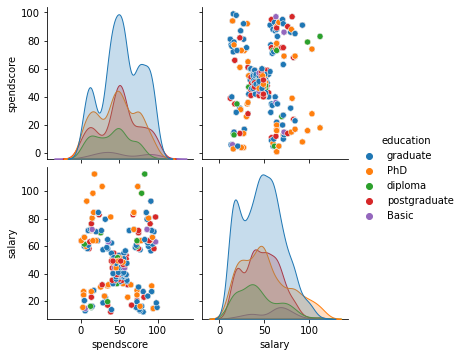

In [52]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='spendscore', y='salary',
                data=df2, hue='education')


# Create a pairplot with Seaborn.
x = df2[['spendscore', 'salary']]

sns.pairplot(df2, vars=x,
             hue='education', diag_kind= 'kde')

**2.1.3 Create scatter and pair plots to visualise possible effects of gender on spend score and salary**

In [53]:
# Drop unnecessary columns
df_gender = df_gender.drop(columns=['age', 'loyalty_points', 'product', 'review', 'summary'])

# Display a summary of the numeric variables.
df_gender.describe()

salary   spendscore
count  2000.000000  2000.000000
mean     48.079060    50.000000
std      23.123984    26.094702
min      12.300000     1.000000
25%      30.340000    32.000000
50%      47.150000    50.000000
75%      63.960000    73.000000
max     112.340000    99.000000

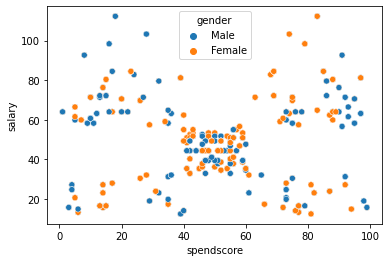

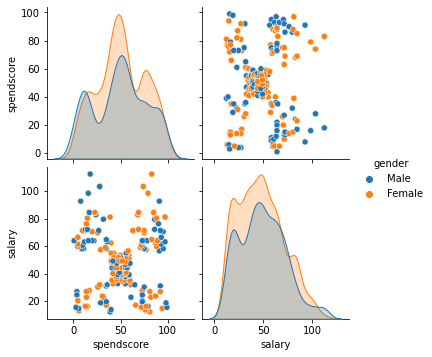

In [54]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='spendscore', y='salary',
                data=df_gender, hue='gender')


# Create a pairplot with Seaborn.
x1 = df2[['spendscore', 'salary']]

sns.pairplot(df_gender, vars=x1,
             hue='gender', diag_kind= 'kde')

**2.1.4 Exploratory recommendation:** As there does not appear to be a significant difference between  male and female gender, this cluster analysis will progress using education as hue.

## Part 3: Conduct k-means cluster analysis

### 3.1 Elbow method

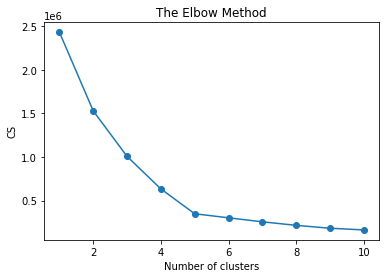

In [55]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

### 3.2 Silhouette method

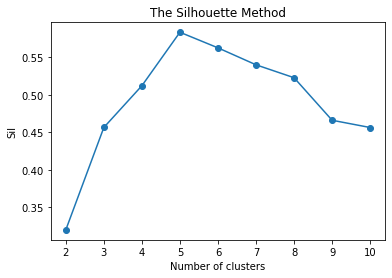

In [56]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

### 3.3 Evaluate k-means model with values of *k*

**3.3.1 Test model using four clusters**

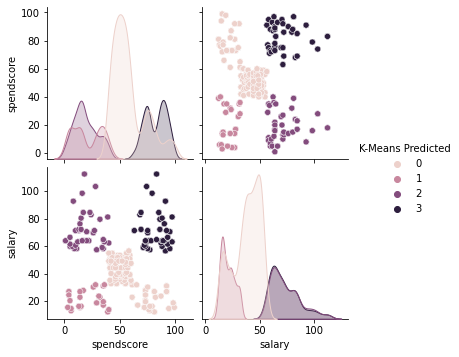

In [57]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [58]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [59]:
# View the K-Means predicted.
print(x.head())

   spendscore  salary  K-Means Predicted
0          39   12.30                  1
1          81   12.30                  0
2           6   13.12                  1
3          77   13.12                  0
4          40   13.94                  1


<AxesSubplot:xlabel='spendscore', ylabel='salary'>

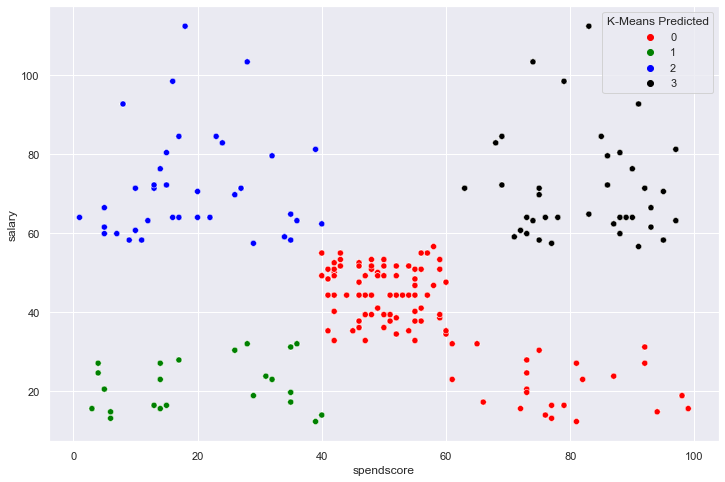

In [60]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spendscore' , 
                y ='salary',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

In [61]:
plt.savefig('4clusters.png')

<Figure size 864x576 with 0 Axes>

**3.3.2 Test model using five clusters**

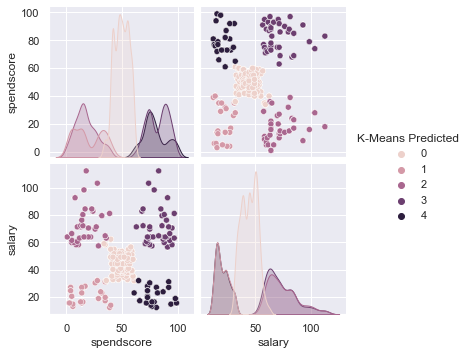

In [62]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [63]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [64]:
# View the K-Means predicted.
print(x.head())

   spendscore  salary  K-Means Predicted
0          39   12.30                  1
1          81   12.30                  4
2           6   13.12                  1
3          77   13.12                  4
4          40   13.94                  1


<AxesSubplot:xlabel='spendscore', ylabel='salary'>

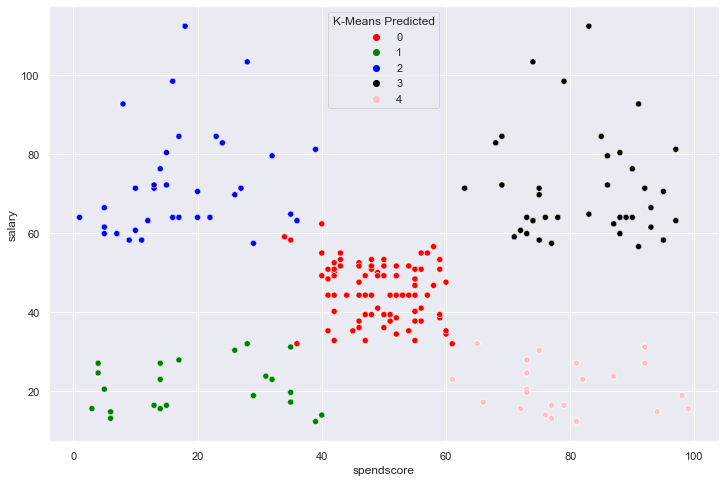

In [65]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spendscore' , 
                y ='salary',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'pink'])

In [66]:
plt.savefig('5clusters.png')

<Figure size 864x576 with 0 Axes>

**3.3.3 Test model using seven clusters**

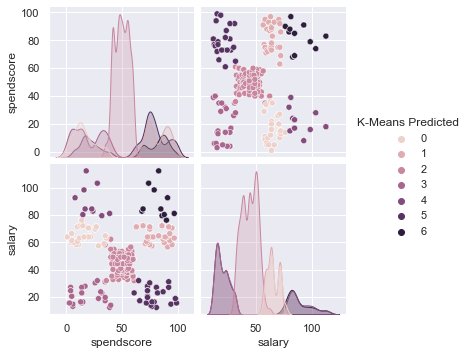

In [67]:
# Use 7 clusters:
kmeans = KMeans(n_clusters = 7, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [68]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

2    767
3    271
5    269
1    227
0    214
6    129
4    123
Name: K-Means Predicted, dtype: int64

In [69]:
# View the K-Means predicted.
print(x.head())

   spendscore  salary  K-Means Predicted
0          39   12.30                  3
1          81   12.30                  5
2           6   13.12                  3
3          77   13.12                  5
4          40   13.94                  3


<AxesSubplot:xlabel='spendscore', ylabel='salary'>

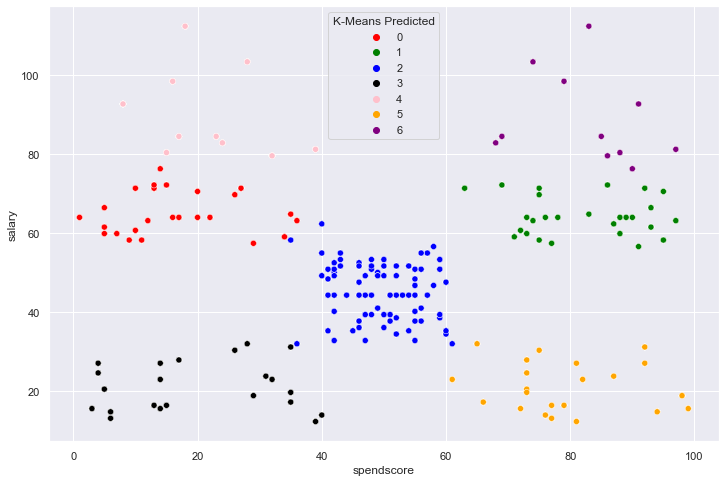

In [70]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spendscore' , 
                y ='salary',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'pink', 'orange', 'purple'])

In [71]:
plt.savefig('7clusters.png')

<Figure size 864x576 with 0 Axes>

## Part 4: Fit final model and justify cluster choice

### 4.1 Cluster choice justification

Preferred K number is 5
- 5 represent ideal point in both Elbow and Silhouette methods.
- When testing 4 clusters the pairplot shows how to separate clusters are merged incorrectly - this is corrected when 5 clusters are used. The 5 cluster number appears to best fit the distribution of dots. 
- The value of 7 was also tested as on the Silhouette methods shows another point on the plot where a significant change is line plot can be observed. However when plotted, the additional 2 clusters appears to be drawn from existing clusters becase they appear more as outliers. However, they appear to better fit with the 5 clusters rather than represent new clusters in their own right.

### 4.2 Deploy 5 cluster model

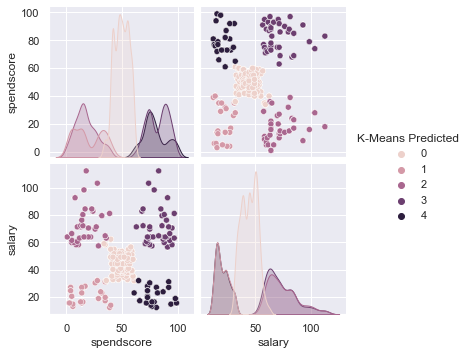

In [72]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [73]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [74]:
# View the K-Means predicted.
print(x.head())

   spendscore  salary  K-Means Predicted
0          39   12.30                  1
1          81   12.30                  4
2           6   13.12                  1
3          77   13.12                  4
4          40   13.94                  1


<AxesSubplot:xlabel='spendscore', ylabel='salary'>

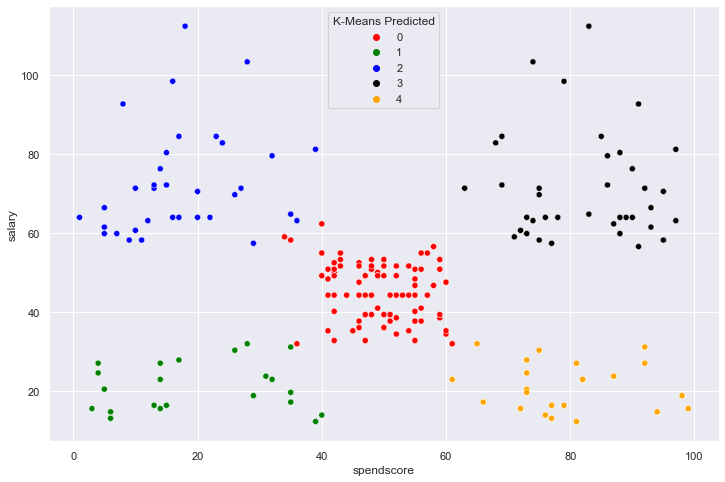

In [75]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spendscore' , 
                y ='salary',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

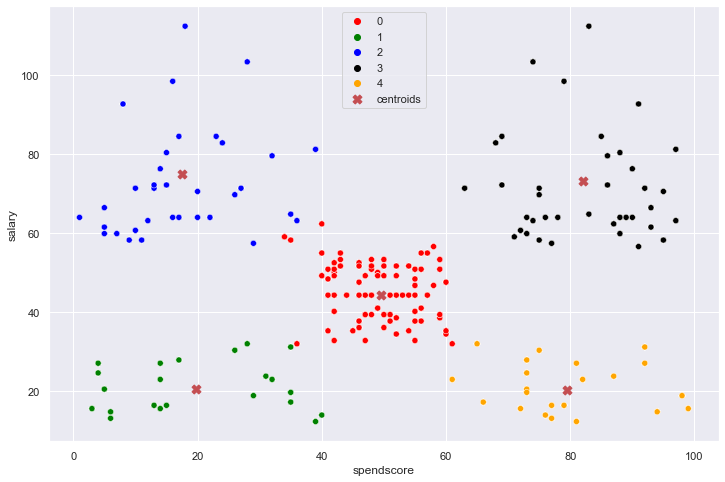

In [76]:
sns.scatterplot(x='spendscore' , 
                y ='salary',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

### Part 5: Insights and oberservations

### 5.1 Impact of Gender on customer spend score and salary correlations

Exploratory scatter and pair plots suggests a fairly even distribution of male female gender among levels of spend score and salary.However, it can be observed that female customers have slightly higher salary and spend score levels than male customers.

### 5.2 Impact of Education on customer spend score and salary correlations

Differences can be observed when exploring the impact of educational attainment levels on customer spend score and salary correlations. 

In terms of spend score, educational levels can be ranked as follows - where 1 is highest spend score and 5 is lowest spend score:

- 1. Graduate
- 2. PhD
- 3. Postgrduate
- 4. Diploma
- 5. Basic

A similar pattern of educational levels can be observed, in terms of salary. Educational levels can be ranked as follows - where 1 is highest salary and 5 is lowest salary:

- 1. Graduate
- 2/3. PhD / Postgrduate
- 4. Diploma
- 5. Basic

These findings suggest that Turtle Games customers who have higher educational levels have higher spend scores and salaries. It is proposed that further exploration of the educational attainment levels of customers could provide further insights to inform the creation of customer target segements.


### 5.3 K-means Clustering findings and insights

**Finding 1: customers earning between 35K and 55K will have a spendscore of between 40 and 60, plus largest group**
The 5 cluster plot shows that data points in the red cluster are most closely aligned with it's centroid. This suggests that we can be most confident in predicting that customers who earn between 35K and 55K will have a spendscore of between 40 and 60. We can also predict that this will form the largest customer group size (indicated by red cluster).

**Finding 2: Customers within the two second largest clusters both earn 60K to 12K**
However, they differ in that one cluster (blue colour) has a lower spend score of 20 to 40 when compared to the other cluster (black colour) which has a higher spendscore of 60 to 100.

**Finding 3: Customers within the two smallest clusters both earn lower salaries of between 0K and 40K**
As in Finding 2, they differ in that one cluster (green colour) has a lower spend score of 20 to 40 when compared to the other cluster (orange colour) which has a higher spendscore of 60 to 100.

**Finding 4: Consistent, close alignement with cluster centroid can only be observed within the red cluster**
i.e. those earning between 35K and 55K with a spendscore of between 40 and 60. All other clusters exhibit a broader, less consistently aligned spread from their centroids. 

------------------------------------------------------------------------------

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## Part 1: Load and explore data

### 1.1 Load data

In [52]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [53]:
# Load the data set as df3.
df3 = pd.read_csv('reviews_clean.csv')

df3.head()

gender  age  salary  spendscore  loyalty_points education  product  \
0    Male   18   12.30          39             210  graduate      453   
1    Male   23   12.30          81             524  graduate      466   
2  Female   22   13.12           6              40  graduate      254   
3  Female   25   13.12          77             562  graduate      263   
4  Female   33   13.94          40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

### 1.2 Explore and sense check data

In [54]:
# Explore data shape.
df3.shape

(2000, 9)

In [55]:
# Explore data types
df3.dtypes

gender             object
age                 int64
salary            float64
spendscore          int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object

In [56]:
# Explore data info overview.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   salary          2000 non-null   float64
 3   spendscore      2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [57]:
# Explore data summary statistics
df3.describe()

age       salary   spendscore  loyalty_points       product
count  2000.000000  2000.000000  2000.000000     2000.000000   2000.000000
mean     39.495000    48.079060    50.000000     1578.032000   4320.521500
std      13.573212    23.123984    26.094702     1283.239705   3148.938839
min      17.000000    12.300000     1.000000       25.000000    107.000000
25%      29.000000    30.340000    32.000000      772.000000   1589.250000
50%      38.000000    47.150000    50.000000     1276.000000   3624.000000
75%      49.000000    63.960000    73.000000     1751.250000   6654.000000
max      72.000000   112.340000    99.000000     6847.000000  11086.000000

In [58]:
# List column names
df3.columns

Index(['gender', 'age', 'salary', 'spendscore', 'loyalty_points', 'education',
       'product', 'review', 'summary'],
      dtype='object')

In [59]:
# Create a copy
df4 = df3.copy()

In [60]:
# Keep necessary columns. Drop unnecessary columns.
dfreviews = df4.drop(columns=['gender', 'age', 'salary', 'spendscore', 'loyalty_points', 'education', 'product'])

dfreviews.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [61]:
# Determine if there are any missing values.
dfreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [62]:
# Determine sum of missing values
dfreviews.isnull().sum()

review     0
summary    0
dtype: int64

## Part 2: Prepare data for NLP analysis

### 2.1 Change review and summary columns to lower case

In [63]:
# Review: Change all to lower case and join with a space.
dfreviews['review'] = dfreviews['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

dfreviews.head()

review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [64]:
# Summary: Change all to lower case and join with a space.
dfreviews['summary'] = dfreviews['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

dfreviews.head()

review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

### 2.2 Replace punctuation in each of the columns

In [65]:
# Replace all the punctuations in review column.
dfreviews['review'] = dfreviews['review'].str.replace('[^\w\s]','')

dfreviews['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [66]:
# Replace all the puncuations in summary column.
dfreviews['summary'] = dfreviews['summary'].str.replace('[^\w\s]','')

dfreviews['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2.3 Drop duplicates in each column

In [67]:
# Check the number of duplicate values in the review column.
dfreviews.review.duplicated().sum()

50

In [68]:
# Drop duplicates in review column
dfreviews = dfreviews.drop_duplicates(subset=['review'])

# Preview data.
dfreviews.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [69]:
# Check the number of duplicate values in the review column.
dfreviews.review.duplicated().sum()

0

In [70]:
# Check the number of duplicate values in the summary column.
dfreviews.summary.duplicated().sum()

601

In [71]:
# Drop duplicates in summary column
dfreviews = dfreviews.drop_duplicates(subset=['summary'])

# Preview data.
dfreviews.reset_index(inplace=True)
dfreviews.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [72]:
# View the shape of the data.
dfreviews.shape

(1349, 3)

In [73]:
# View first five rows of DataFrame
dfreviews.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

### 2.4 Combine the review and summary column into a new DataFrame

In [74]:
# Create a copy
df_testing = dfreviews.copy()

In [75]:
# View column names
df_testing.columns

Index(['index', 'review', 'summary'], dtype='object')

In [76]:
df_testing = df_testing[['index', 'review', 'summary']]

In [77]:
df_testing.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [78]:
# Combine variables
df_testing['all'] = df_testing['review'] + df_testing['summary']

In [79]:
df_testing.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                                 all  
0  when it comes to a dms screen the space on the...  
1  an open letter to galeforce9 your unpainted mi...  
2  nice art nice printing why two panels are fill...  
3  amazing buy bought it as a gift for our new dm...  
4  as my review of gf9s previous screens these we...

In [80]:
# Drop review column
df_testing.drop('review', inplace=True, axis=1)

In [81]:
# Drop summary column
df_testing.drop('summary', inplace=True, axis=1)

In [82]:
df_testing.head()

index                                                all
0      0  when it comes to a dms screen the space on the...
1      1  an open letter to galeforce9 your unpainted mi...
2      2  nice art nice printing why two panels are fill...
3      3  amazing buy bought it as a gift for our new dm...
4      4  as my review of gf9s previous screens these we...

In [83]:
# Reset index
df_testing.drop('index', inplace=True, axis=1)

In [84]:
df_sumrevs = df_testing.copy()

In [85]:
df_sumrevs.head()

all
0  when it comes to a dms screen the space on the...
1  an open letter to galeforce9 your unpainted mi...
2  nice art nice printing why two panels are fill...
3  amazing buy bought it as a gift for our new dm...
4  as my review of gf9s previous screens these we...

## Part 3: Tokenise and create wordclouds

### 3.1 Prepare data

In [86]:
# Create a copy of the dfreviews DataFrame
dfrevcopy = dfreviews.copy()

dfrevcopy

index                                             review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1344   1989  this is a fun card game for people who like wo...   
1345   1990  fun for the family just make certain you agree...   
1346   1992  great game to keep the mind active we play it ...   
1347   1994  we are retired and find this a great way to st...   
1348   1995  the perfect word game for mixed ages with mom ...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1344  this is a fun card game for people who like words  
1345  sort of a card game equivalent of scrabble and...  
1346                 great game to keep the mind active  
1347                                  a great mind game  
1348      the perfect word game for mixed ages with mom  

[1349 rows x 3 columns]

### 3.2 Tokenise Review column

In [87]:
# Apply tokenisation to Review column.
dfrevcopy['rtokens'] = dfrevcopy['review'].apply(word_tokenize)

# Preview data.
dfrevcopy['rtokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: rtokens, dtype: object

In [88]:
# Define an empty list of tokens.
all_rtokens = []

for i in range(dfrevcopy.shape[0]):
    # Add each token to the list.
    all_rtokens = all_rtokens + dfrevcopy['rtokens'][i]

In [89]:
# Define an empty string variable.
rtokens_string = ''

for value in all_rtokens:
    # Add each token word to the string.
    rtokens_string = rtokens_string + value + ' '

### 3.3 Visualise Review words with a Wordcloud

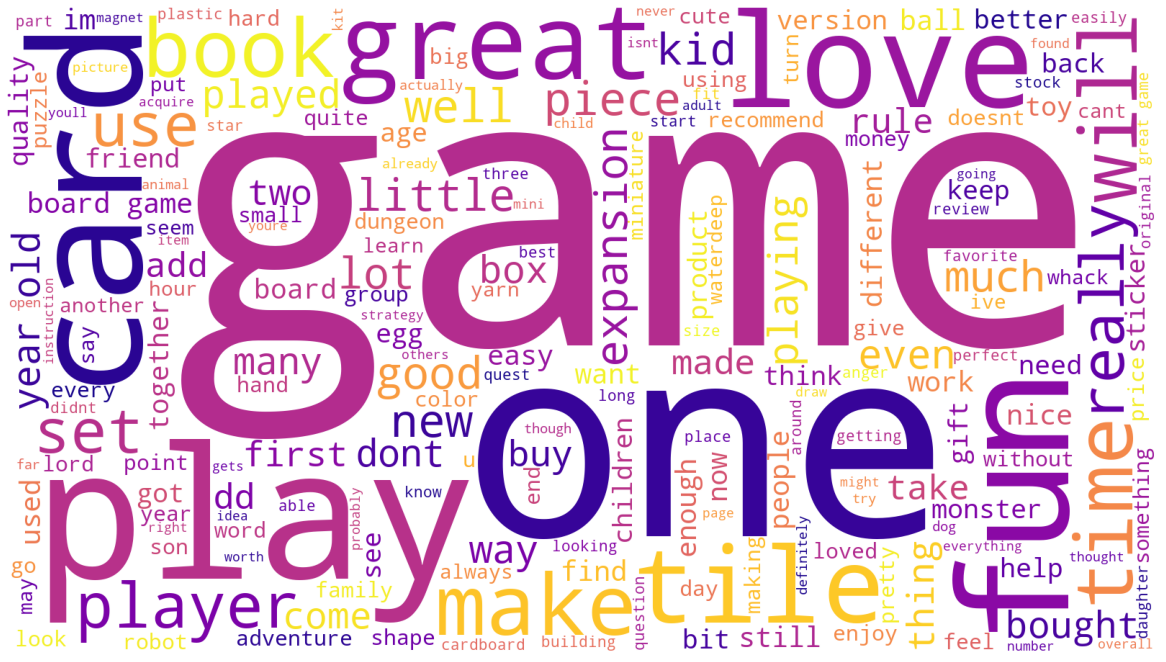

In [91]:
# Create a WordCloud.
rwordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(rtokens_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(rwordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 3.4 Tokenise Summary column

In [92]:
# Apply tokenisation to Review column.
dfrevcopy['stokens'] = dfrevcopy['summary'].apply(word_tokenize)

# Preview data.
dfrevcopy['stokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: stokens, dtype: object

In [93]:
# Define an empty list of tokens.
all_stokens = []

for i in range(dfrevcopy.shape[0]):
    # Add each token to the list.
    all_stokens = all_stokens + dfrevcopy['stokens'][i]

In [94]:
# Define an empty string variable.
stokens_string = ''

for value in all_stokens:
    # Add each token word to the string.
    stokens_string = stokens_string + value + ' '

### 3.5 Visualise Summary words with a Wordcloud

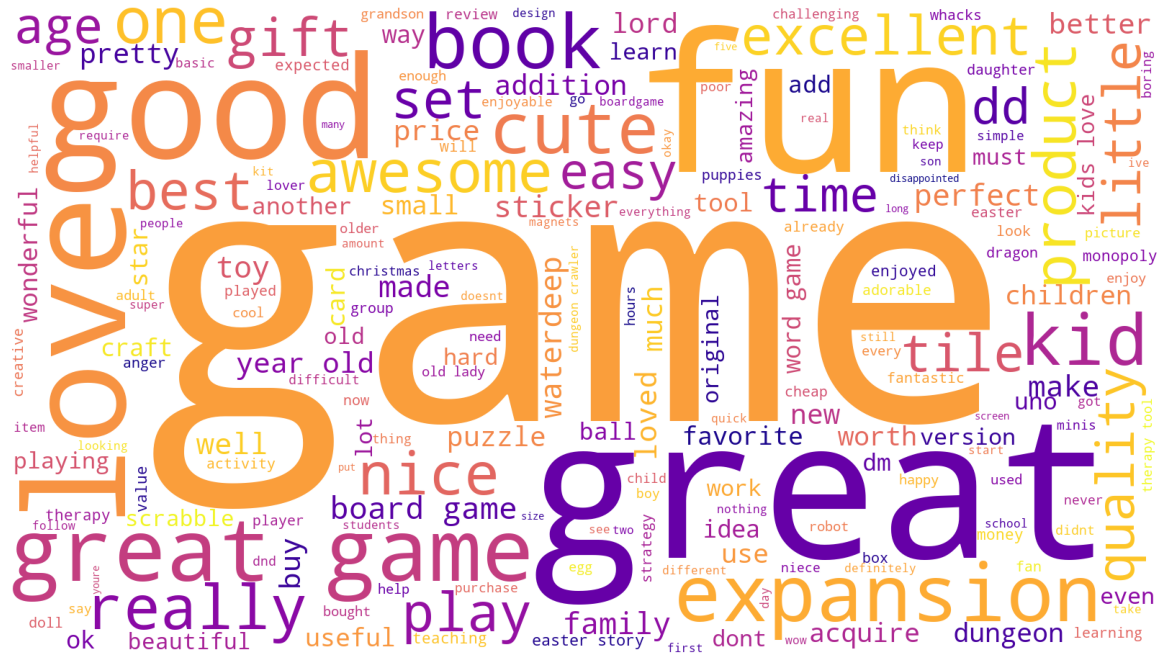

In [95]:
# Create a WordCloud.
swordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(stokens_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(swordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 3.6 Tokenise combined summary and review comments (df_sumrevs)

In [96]:
# Apply tokenisation to all column of the df_sumrevs DataFrame
df_sumrevs['srtokens'] = df_sumrevs['all'].apply(word_tokenize)

# Preview data.
df_sumrevs['srtokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: srtokens, dtype: object

In [97]:
# Define an empty list of tokens.
sr_tokens = []

for i in range(df_sumrevs.shape[0]):
    # Add each token to the list.
    sr_tokens = sr_tokens + df_sumrevs['srtokens'][i]

In [98]:
# Define an empty string variable.
srtokens_string = ''

for value in sr_tokens:
    # Add each token word to the string.
    srtokens_string = srtokens_string + value + ' '

### 3.7 Visualise combined summary and review words with a Wordcloud

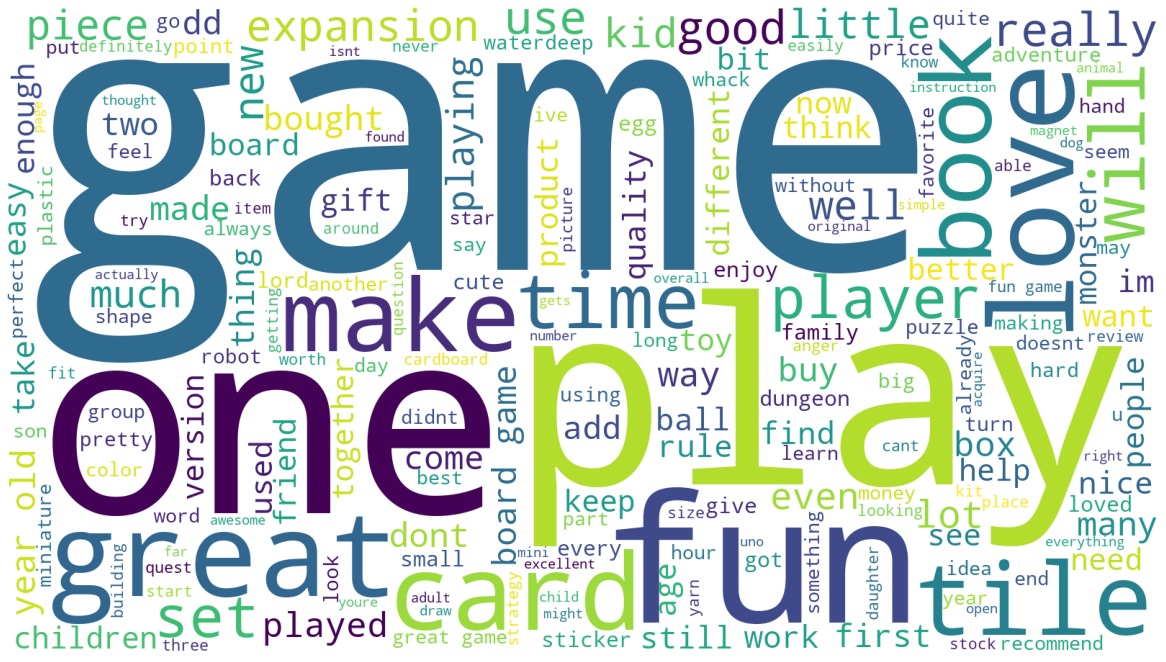

In [99]:
# Create a WordCloud.
srwordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='viridis', 
                min_font_size = 10).generate(srtokens_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(srwordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## Part 4: Frequency distribution and Word Clouds

### 4.1 Create frequency distributions

**4.1.1 Review frequency distribution**

In [100]:
# Determine the Review frequency distribution.
fdistr = FreqDist(all_rtokens)

# Preview data.
fdistr

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

**4.1.2 Summary frequency distribution**

In [101]:
# Determine the Summary frequency distribution.
fdists = FreqDist(all_stokens)

# Preview data.
fdists

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

**4.1.3 Combine Summary and Review frequency distribution**

In [102]:
# Determine the combined Summary and Reviews frequency distribution.
fdistsr = FreqDist(sr_tokens)

# Preview data.
fdistsr

FreqDist({'the': 5239, 'and': 3095, 'to': 3035, 'a': 3010, 'of': 2391, 'i': 1937, 'it': 1885, 'is': 1693, 'this': 1617, 'for': 1582, ...})

### 4.2 Remove alphanumeric characters and stopwords

**4.2.1 Review: remove alphanumeric and stopwords**

In [103]:
# Delete all the alpanumeric that are neither alphabets nor numbers for Review column
tokensR = [word for word in all_rtokens if word.isalnum()]

In [104]:
# Remove all the stopwords in Review

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokensR2 = [x for x in tokensR if x.lower() not in english_stopwords]

# Define an empty string variable.
tokensR2_string = ''

for value in tokensR2:
    # Add each filtered token word to the string.
    tokensR2_string = tokensR2_string + value + ' '

**4.2.2 Summary: remove alphanumeric and stopwords**

In [105]:
# Delete all the alpanumeric that are neither alphabets nor numbers for Review column
tokensS = [word for word in all_stokens if word.isalnum()]

In [106]:
# Remove all the stopwords in Summary

# Create a filtered list of tokens without stop words.
tokensS2 = [x for x in tokensS if x.lower() not in english_stopwords]

# Define an empty string variable.
tokensS2_string = ''

for value in tokensS2:
    # Add each filtered token word to the string.
    tokensS2_string = tokensS2_string + value + ' '

**4.2.3 Combined summary and review: remove alphanumeric and stopwords**

In [107]:
# Delete all the alpanumeric that are neither alphabets nor numbers for Review column
tokensSR = [word for word in sr_tokens if word.isalnum()]

In [108]:
# Remove all the stopwords in combined Summary and Review

# Create a filtered list of tokens without stop words.
tokensSR2 = [x for x in tokensSR if x.lower() not in english_stopwords]

# Define an empty string variable.
tokensSR2_string = ''

for value in tokensS2:
    # Add each filtered token word to the string.
    tokensSR2_string = tokensSR2_string + value + ' '

### 4.3 Wordclouds without stopwords

**4.3.1 Combined Review and Summary Wordcloud (without stopwords)**

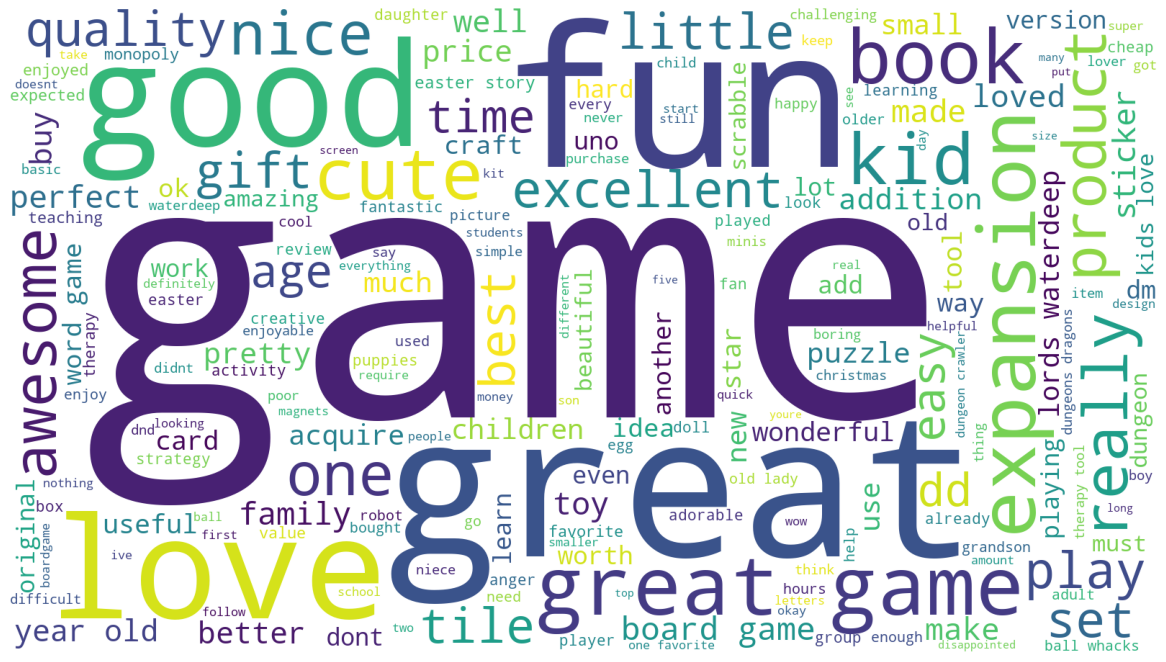

In [109]:
# Create a WordCloud for combined Review and Summary columns (without stopwords)
srwordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='viridis', 
                min_font_size = 10).generate(tokensSR2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(srwordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

**4.3.2 Review Wordcloud (without stopwords)**

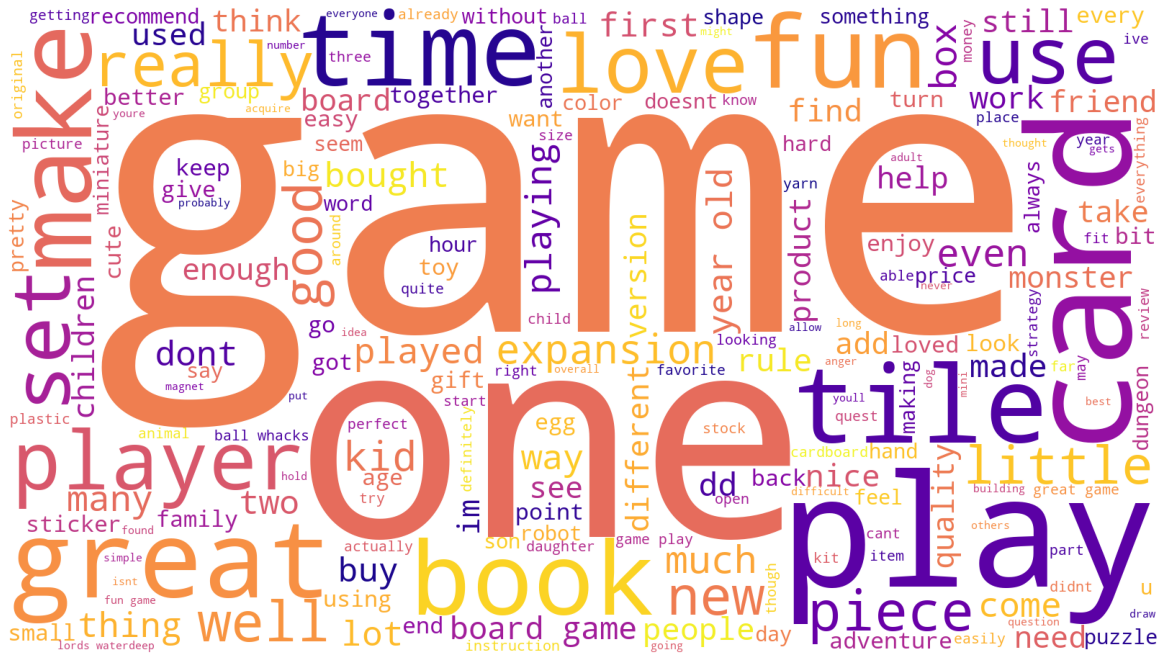

In [110]:
# Create a WordCloud for Review column (without stopwords)
rwordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokensR2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(rwordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

**4.3.3 Summary Wordcloud (without stopwords)**

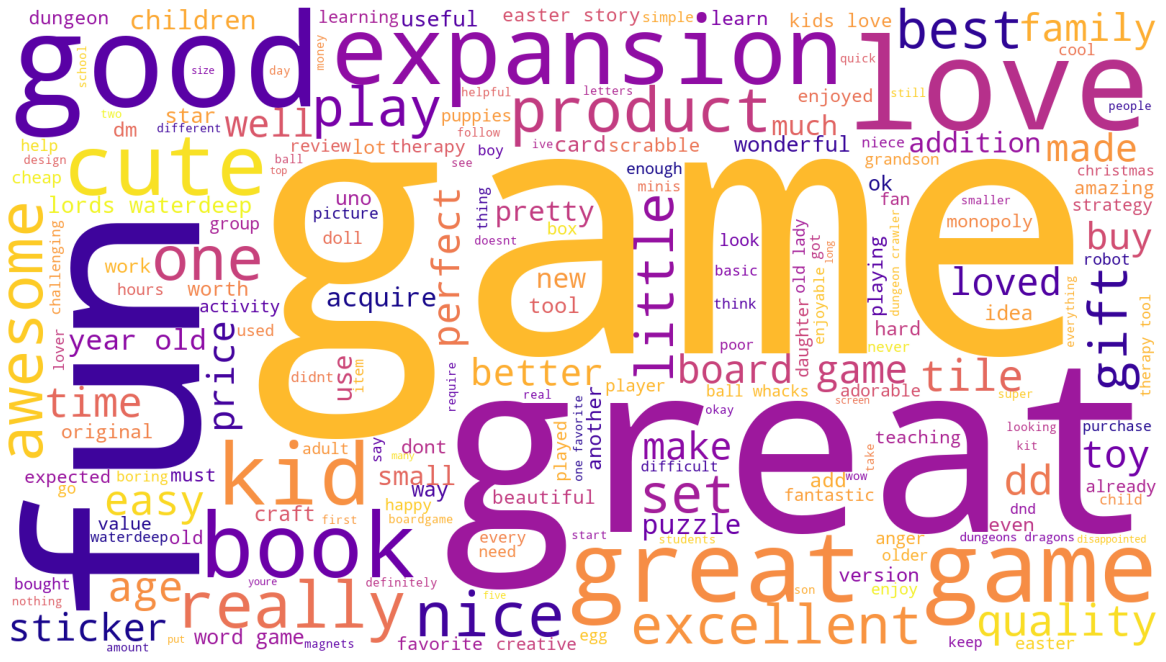

In [111]:
# Create a WordCloud for Summary column (without stopwords)
swordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokensS2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(swordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## Part 5: Identify 15 most common words

### 5.1 Determine the 15 most common words

**5.1.1 Review: identify the 15 most common words**

In [112]:
# Preview the Review frequency distribution.
fdistr

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

In [113]:
# Generate a DataFrame for Review words from Counter.
rcounts = pd.DataFrame(Counter(tokensR2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
rcounts

Frequency
Word             
game         1359
one           475
play          442
fun           407
great         391
like          373
get           293
cards         281
tiles         280
really        278
book          259
would         252
well          246
time          244
new           237

**5.1.2 Review: plot the 15 most common words**

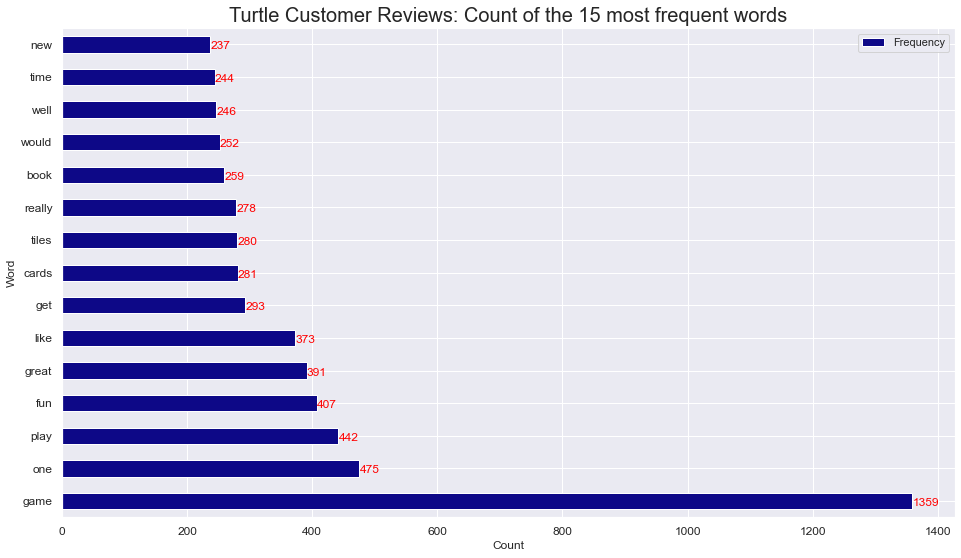

In [138]:
# Set the plot type.
ax = rcounts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Customer Reviews: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

**5.1.3 Summary: identify the 15 most common words**

In [139]:
# Preview the Summary frequency distribution.
fdists

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

In [140]:
# Generate a DataFrame for Review words from Counter.
scounts = pd.DataFrame(Counter(tokensS2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
scounts

Frequency
Word                
game             268
great            236
fun              175
good              84
love              70
like              54
kids              48
book              42
expansion         42
cute              40
old               34
really            30
set               29
nice              28
one               28

**5.1.4 Summary: plot the 15 most common words**

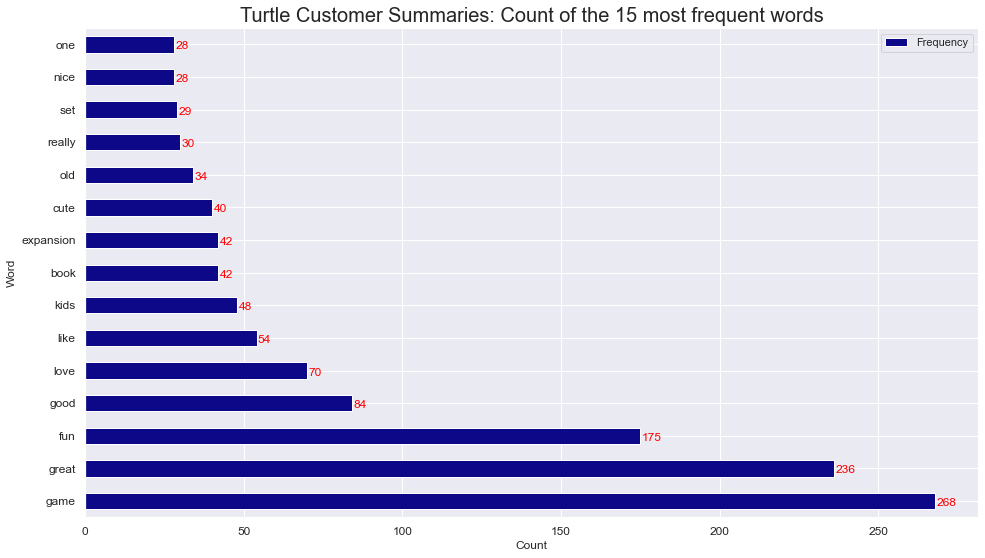

In [141]:
# Set the plot type.
ax = scounts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Customer Summaries: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

**5.1.5 Combined summary and review: identify the 15 most common words**

In [142]:
# Preview data.
fdistsr

FreqDist({'the': 5239, 'and': 3095, 'to': 3035, 'a': 3010, 'of': 2391, 'i': 1937, 'it': 1885, 'is': 1693, 'this': 1617, 'for': 1582, ...})

In [143]:
# Generate a DataFrame for Review and Summary words from Counter.
srcounts = pd.DataFrame(Counter(tokensSR2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
srcounts

Frequency
Word             
game         1572
fun           504
one           482
great         467
play          453
like          420
really        301
get           300
tiles         296
book          291
cards         283
love          280
would         265
good          262
new           253

**5.1.6 Combined summary and review: plot the 15 most common words**

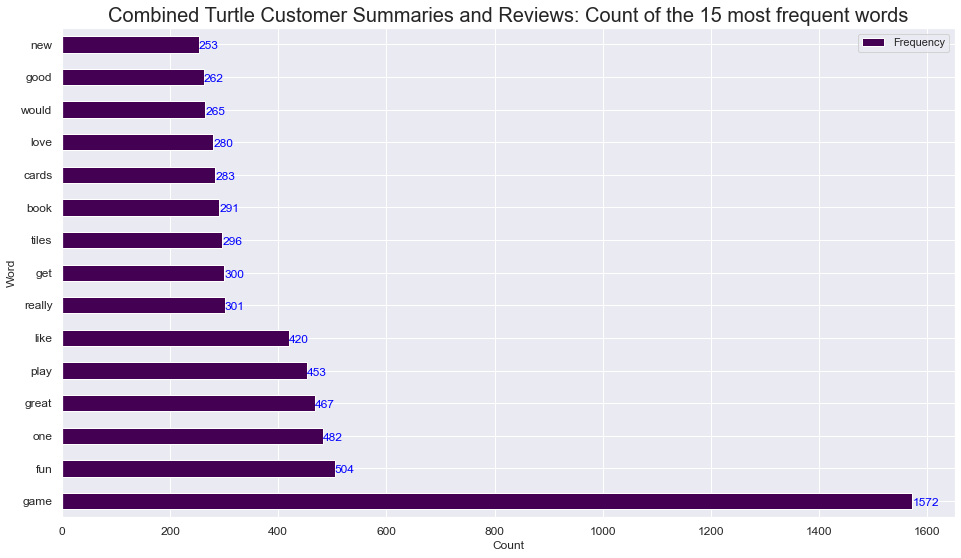

In [144]:
# Set the plot type.
ax = srcounts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='viridis')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Combined Turtle Customer Summaries and Reviews: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='blue')

## Part 6: Polarity and subjectivity

### 6.1 Polarity and subjectivity: Reviews

**6.1.1 Review polarity**

In [145]:
# Define a function to extract a polarity score for reviews.
def generate_rpolarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
dfreviews['rpolarity'] = dfreviews['review'].apply(generate_rpolarity)

# Preview the result.
dfreviews['rpolarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: rpolarity, dtype: float64

In [146]:
# Describe Review Summary statistics
dfreviews['rpolarity'].describe()

count    1349.000000
mean        0.181170
std         0.225455
min        -1.000000
25%         0.040476
50%         0.153571
75%         0.308889
max         1.000000
Name: rpolarity, dtype: float64

**6.1.2 Review subjectivity**

In [147]:
# Define a function to extract a subjectivity score for the comment.
def generate_rsubjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
dfreviews['rsubjectivity'] = dfreviews['review'].apply(generate_rsubjectivity)

# Preview the result.
dfreviews['rsubjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: rsubjectivity, dtype: float64

In [148]:
# Describe Review Summary statistics
dfreviews['rsubjectivity'].describe()

count    1349.000000
mean        0.513432
std         0.162243
min         0.000000
25%         0.432164
50%         0.500833
75%         0.599242
max         1.000000
Name: rsubjectivity, dtype: float64

**6.1.3 Review polarity histogram**

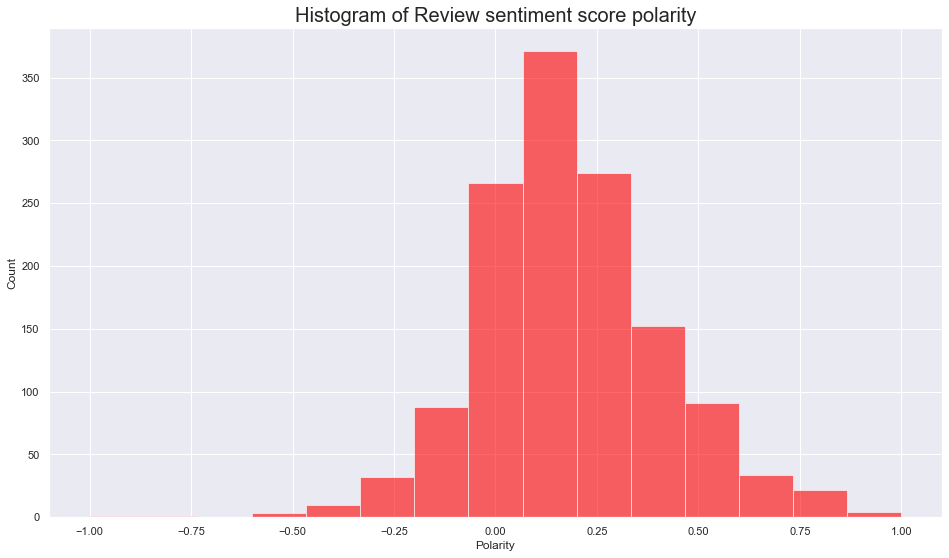

In [149]:
# Review: Create a histogram plot with bins = 15.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(dfreviews['rpolarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Review sentiment score polarity', fontsize=20)

plt.show();

**6.1.4 Review subjectivity histogram**

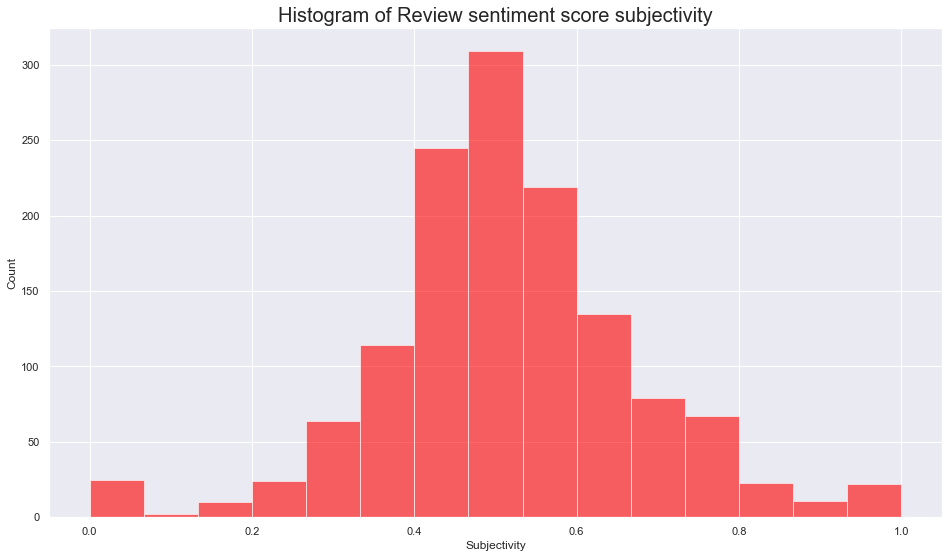

In [150]:
# Set the number of bins.
num_bins2 = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(dfreviews['rsubjectivity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Review sentiment score subjectivity', fontsize=20)

plt.show();

### 6.2 Polarity and subjectivity: Summary

**6.2.1 Summary polarity**

In [151]:
# Define a function to extract a polarity score for reviews.
def generate_spolarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
dfreviews['spolarity'] = dfreviews['summary'].apply(generate_spolarity)

# Preview the result.
dfreviews['spolarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: spolarity, dtype: float64

In [152]:
# Describe Summary Statistics
dfreviews['spolarity'].describe()

count    1349.000000
mean        0.271704
std         0.349649
min        -1.000000
25%         0.000000
50%         0.250000
75%         0.500000
max         1.000000
Name: spolarity, dtype: float64

**6.2.2 Summary subjectivity**

In [153]:
# Define a function to extract a subjectivity score for the comment.
def generate_ssubjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
dfreviews['ssubjectivity'] = dfreviews['summary'].apply(generate_ssubjectivity)

# Preview the result.
dfreviews['ssubjectivity'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: ssubjectivity, dtype: float64

In [154]:
# Describe Summary Statistics
dfreviews['ssubjectivity'].describe()

count    1349.000000
mean        0.483263
std         0.312286
min         0.000000
25%         0.200000
50%         0.516667
75%         0.733333
max         1.000000
Name: ssubjectivity, dtype: float64

**6.2.3 Summary polarity histogram**

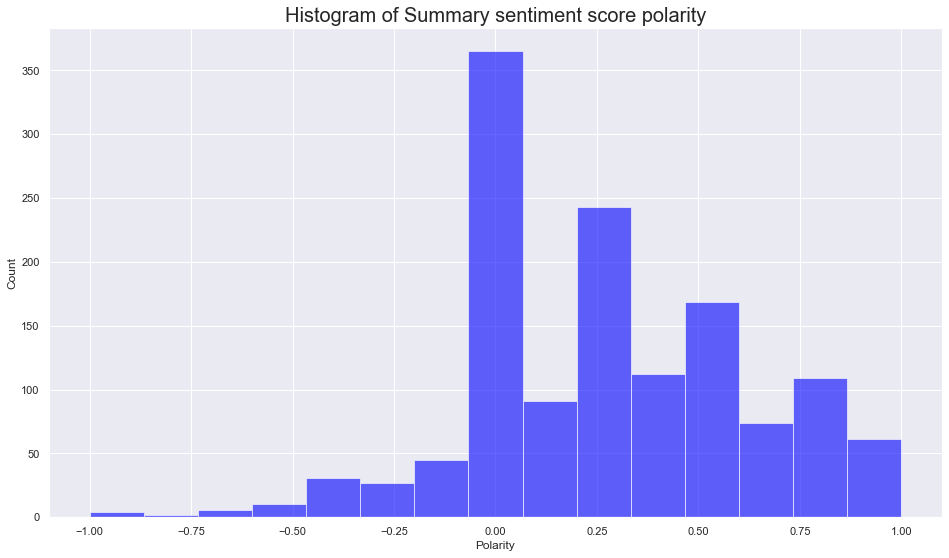

In [155]:
# Summary: Create a histogram plot with bins = 15.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(dfreviews['spolarity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Summary sentiment score polarity', fontsize=20)

plt.show();

**6.2.4 Summary subjectivity histogram**

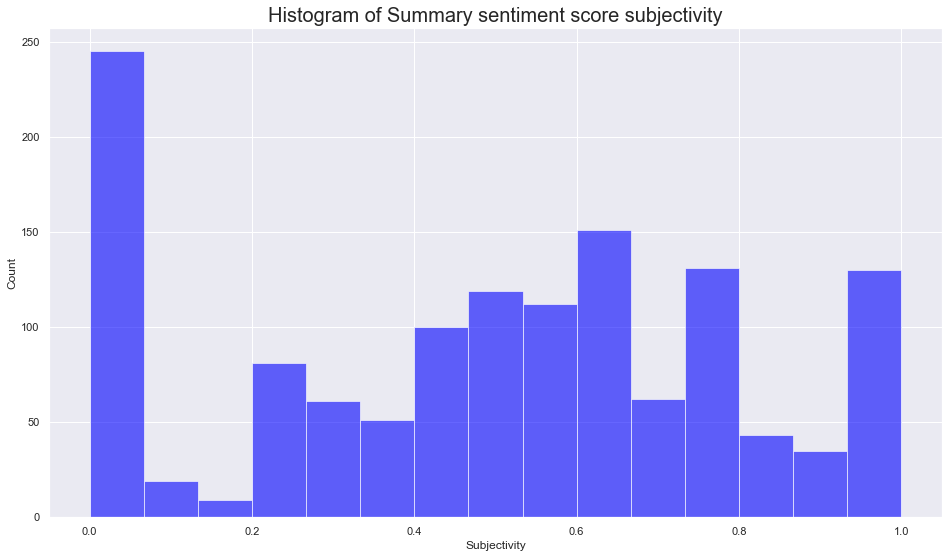

In [156]:
# Set the number of bins.
num_bins2 = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(dfreviews['ssubjectivity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Summary sentiment score subjectivity', fontsize=20)

plt.show();

### 6.3 Polarity and subjectivity: Combined summary and review

**6.3.1 Combined summary and review polarity**

In [157]:
# Define a function to extract a polarity score for combined comments.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df_sumrevs['polarity'] = df_sumrevs['all'].apply(generate_polarity)

# Preview the result.
df_sumrevs['polarity'].head()

0   -0.012500
1   -0.003855
2    0.105901
3    0.368182
4   -0.316667
Name: polarity, dtype: float64

In [158]:
# Describe Combined Statistics
df_sumrevs['polarity'].describe()

count    1349.000000
mean        0.183047
std         0.224798
min        -1.000000
25%         0.042415
50%         0.157639
75%         0.315000
max         1.000000
Name: polarity, dtype: float64

**6.3.2 Combined summary and review subjectivity**

In [159]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df_sumrevs['subjectivity'] = df_sumrevs['all'].apply(generate_subjectivity)

# Preview the result.
df_sumrevs['subjectivity'].head()

0    0.497500
1    0.464739
2    0.437971
3    0.677273
4    0.316667
Name: subjectivity, dtype: float64

In [160]:
# Describe Summary Statistics
df_sumrevs['subjectivity'].describe()

count    1349.000000
mean        0.514188
std         0.159110
min         0.000000
25%         0.433333
50%         0.504167
75%         0.597619
max         1.000000
Name: subjectivity, dtype: float64

**6.3.3 Combined summary and review polarity histogram**

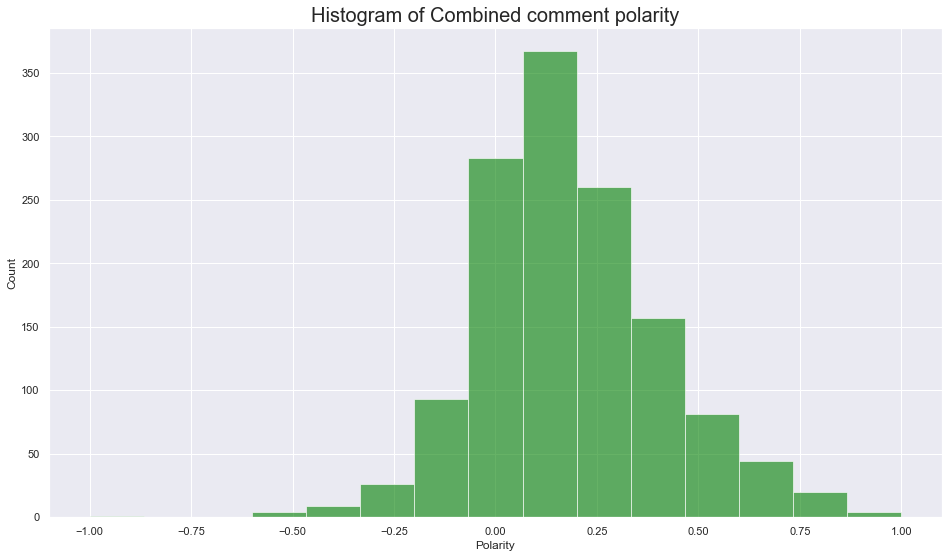

In [161]:
# Summary: Create a histogram plot with bins = 15.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_sumrevs['polarity'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Combined comment polarity', fontsize=20)

plt.show();

**6.3.4 Combined summary and review subjectivity histogram**

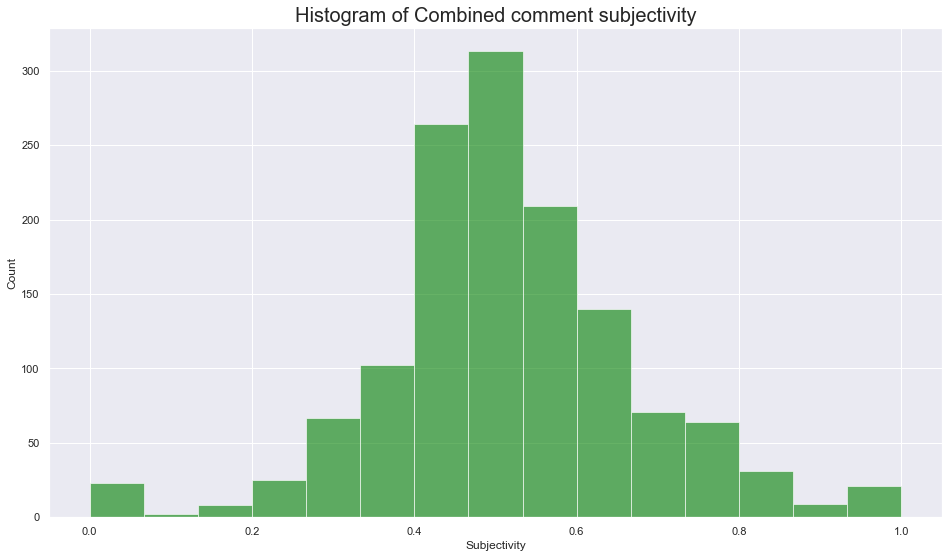

In [162]:
# Set the number of bins.
num_bins2 = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_sumrevs['subjectivity'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Combined comment subjectivity', fontsize=20)

plt.show();

## Part 7: Identify top 20 positive and negative reviews and summaries

### 7.1 Positive and negative Reviews

In [163]:
# View top 5 rows
dfreviews.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  rpolarity  \
0  the fact that 50 of this space is wasted on ar...  -0.036111   
1  another worthless dungeon masters screen from ...   0.035952   
2                     pretty but also pretty useless   0.116640   
3                                         five stars   0.578788   
4                                         money trap  -0.316667   

   rsubjectivity  spolarity  ssubjectivity  
0       0.486111       0.15       0.500000  
1       0.442976      -0.80       0.900000  
2       0.430435       0.00       0.733333  
3       0.784848       0.00       0.000000  
4       0.316667       0.00       0.000000

In [164]:
# View column names
dfreviews.columns

Index(['index', 'review', 'summary', 'rpolarity', 'rsubjectivity', 'spolarity',
       'ssubjectivity'],
      dtype='object')

**7.1.1 List 20 most positive reviews**

In [165]:
# Create a Review Sentiment DataFrame.
rpositive_sentiment = dfreviews.nlargest(20, 'rpolarity')

# Eliminate unnecessary columns.
rpositive_sentiment = rpositive_sentiment[['review', 'rpolarity', 'rsubjectivity']]

# Rename columns
rpositive_sentiment.rename(columns = {'rpolarity':'polarity', 'rsubjectivity':'subjectivity'}, inplace=True)

# Adjust the column width.
rpositive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

**7.1.2 List 20 most negative Reviews**

In [166]:
# Create a DataFrame.
rnegative_sentiment = dfreviews.nsmallest(20, 'rpolarity')

# Eliminate unnecessary columns.
rnegative_sentiment = rnegative_sentiment[['review', 'rpolarity', 'rsubjectivity']]

# Rename columns
rnegative_sentiment.rename(columns = {'rpolarity':'polarity', 'rsubjectivity':'subjectivity'}, inplace=True)

# Adjust the column width.
rnegative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

### 7.2 Positive and negative Summaries

**7.2.1 List 20 most positive summaries**

In [167]:
# Create a Review Sentiment DataFrame.
spositive_sentiment = dfreviews.nlargest(20, 'spolarity')

# Eliminate unnecessary columns.
spositive_sentiment = spositive_sentiment[['summary', 'spolarity', 'ssubjectivity']]

# Rename columns
spositive_sentiment.rename(columns = {'spolarity':'polarity', 'ssubjectivity':'subjectivity'}, inplace=True)

# Adjust the column width.
spositive_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

**7.2.2 List 20 most negative Summaries**

In [168]:
# Create a Review Sentiment DataFrame.
snegative_sentiment = dfreviews.nsmallest(20, 'spolarity')

# Eliminate unnecessary columns.
snegative_sentiment = snegative_sentiment[['summary', 'spolarity', 'ssubjectivity']]

# Rename columns
snegative_sentiment.rename(columns = {'spolarity':'polarity', 'ssubjectivity':'subjectivity'}, inplace=True)

# Adjust the column width.
snegative_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

## Part 8: Insights and observations

### 7.1 Most frequently occuring words

**'Game' is the most popular word**

With 1572 mentions, customer reviews and summaries show that the most popular words customers use in their comments is 'game'.

Other most popular words with between 400 and 500 mentions are:
fun, one, great, play, like

### 7.2 Polarity and Subjectivity

**Reviews**

Analysis shows that most of the review comments are slightly positive - the average polarity score is 0.18. However strong positive and negative scores are also observed but these are relatively small in number when compared to the range of positive scores.

In terms of subjectivity, most comments appear to be more subjective than objective - the average subjectivity score is 0.51. Zero and one most intense objective and subjective scores are observed but these are relatively small in number.

**Summary**

Analysis shows that most Summary comments are positive. The average Summary comment score is slightly higher at 0.27 than the average Review comments score of 0.18. Visualisation of Summary comments show less even distribution of polarity when compared with Review comment polarity - there are more intense positive sentiments within Summary comments that there is within Review comments.

In terms of subjectivity, there are also differences when comparing the shape of score distributions with that of Review subjectivity scores. Subjectivity scores are more widely spread with the a maximum bin being observed in the most objective score range.

In conclusion it appears that customer comments are largely positive and subjective in nature. Summary comments tend to have a greater range of strongly objective to strongly subjective comments. In contrast, Review comments appear less polarised with comments scoring as mostly mid-range - not too objective / not too subjective.

# 